In [25]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform
%matplotlib inline

from scripts.tools.simulation_tools import *
from scripts.tools.scoring_and_opt_tools import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
theta = pd.read_csv('data/generated_data/sampled_covars_and_pk.csv').to_dict(orient='records')[3]
loss_func = Y


covar_only_dose, value = covariate_dose_selection(theta, loss_func)

tpred, dose_times, dose_sizes, decision_point = setup_experiment(covar_only_dose)




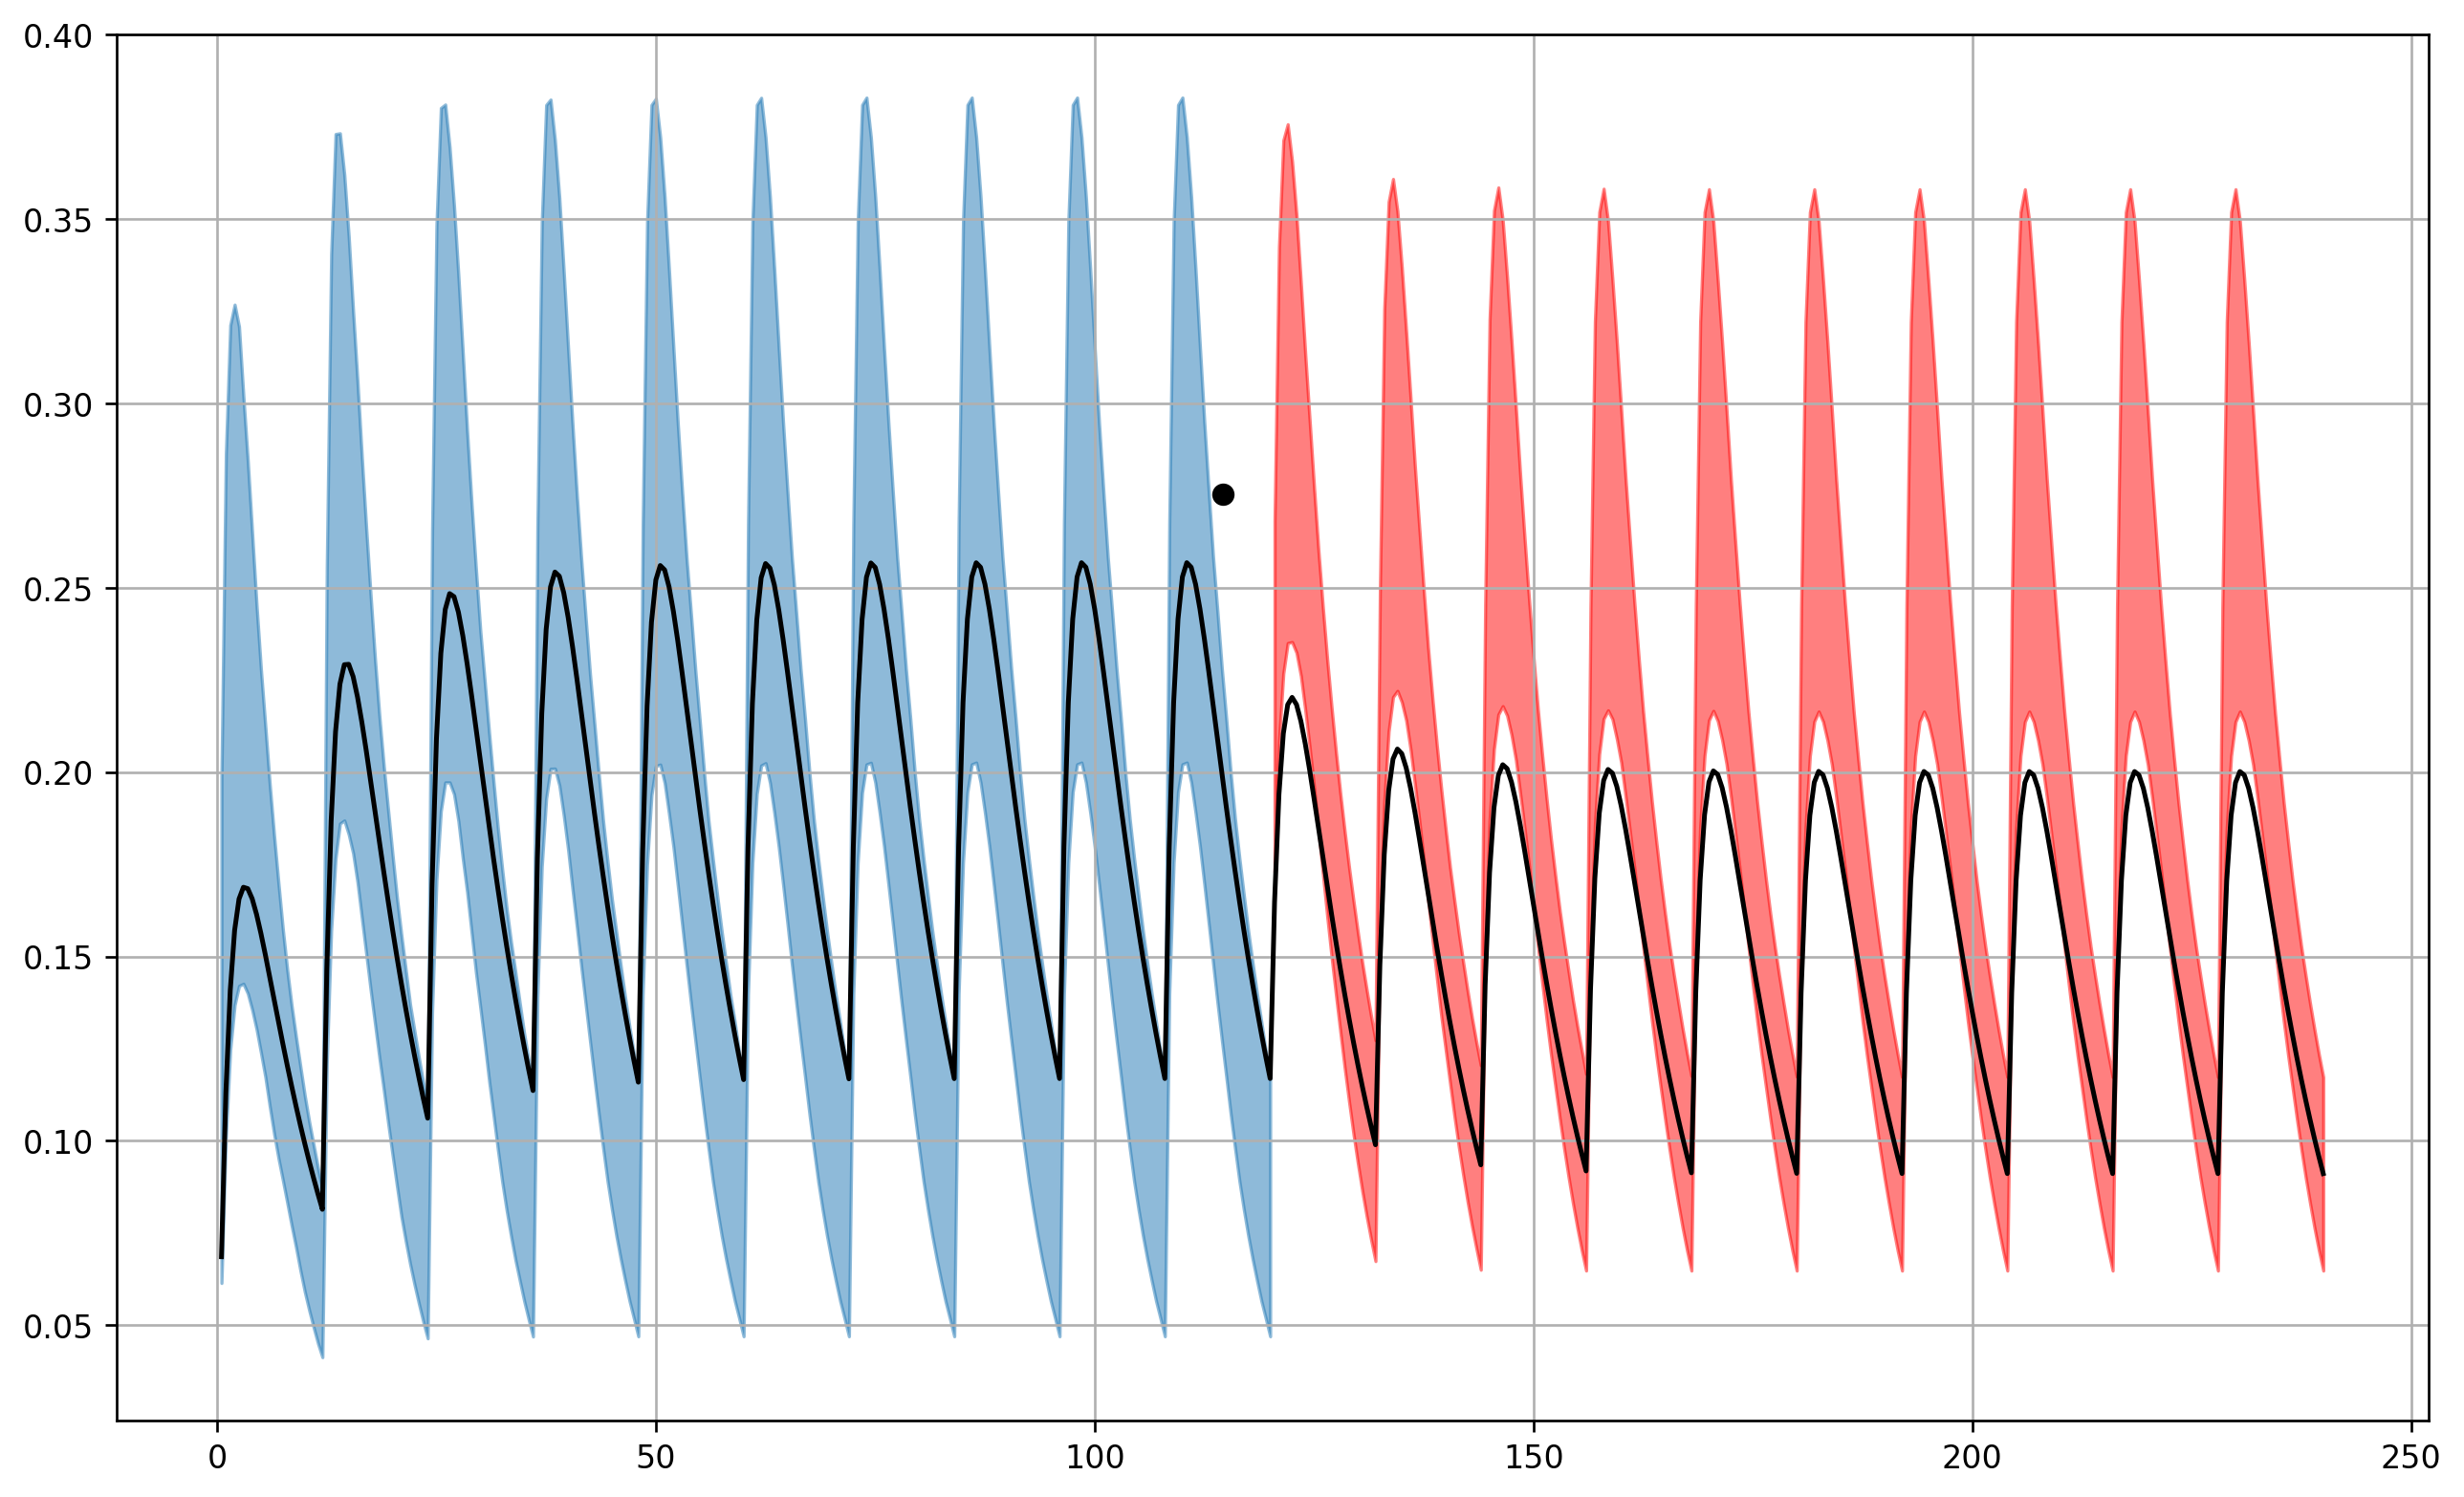

In [27]:
fig, ax = plt.subplots(dpi = 240, figsize = (13, 8))

ax.grid(True, zorder =0)

# Make prior predictions under a given dose
tpre = tpred[tpred<=dose_times[decision_point]]
prior = prior_predict(tpre, theta,  dose_times, dose_sizes)
prior_low = np.quantile(prior, 0.1, axis = 0)
prior_high = np.quantile(prior, 0.9, axis = 0)

plt.fill_between(tpre,
                 prior_low,
                 prior_high,
                 color = 'C0',
                 alpha = 0.5,
                 zorder=1);

# Observe the patient at a random time.
tobs = uniform(loc=108, scale=12).rvs(random_state = 0)
yobs = observe([tobs], theta, dose_times, dose_sizes, return_truth=False, random_state=0)



myopic_dose, value = myopic_dose_selection(theta=theta, yobs = yobs, tobs = [tobs], loss_func=loss_func, start_dose=covar_only_dose)

dose_sizes[decision_point::] = myopic_dose

plt.scatter(tobs, yobs, c='k', zorder = 1000)

# Adjust the dose
predict = fit(tobs, yobs, theta, dose_times, dose_sizes)

post_a, post_b = predict(tpred[tpred>dose_times[decision_point]],dose_times, dose_sizes)
post = post_a + post_b
post_low = np.quantile(post, 0.1, axis = 0)
post_high = np.quantile(post, 0.9, axis = 0)

plt.fill_between(tpred[tpred>dose_times[decision_point]],
                 post_low,
                 post_high,
                 color = 'red',
                 alpha = 0.5,
                 zorder=1);


*_, ytrue = observe(tpred, theta, dose_times, dose_sizes)

plt.plot(tpred, ytrue, color = 'k')

In [28]:
prior_low.shape

(240,)

In [29]:
post_low.shape

(240,)

In [30]:
pd.DataFrame({
    
    'tpre': tpre,
    'tpost': tpred[tpred>dose_times[decision_point]],
    'prior_low': prior_low,
    'prior_high': prior_high,
    'post_low': post_low,
    'post_high': post_high,
    'tobs': tobs,
    'yobs': yobs[0],
    'ytrue_prior': ytrue[tpred<=dose_times[decision_point]],
    'ytrue_post': ytrue[tpred>dose_times[decision_point]],
    'dose_1':12.780,
    'dose_2': 15
}).to_csv('data/generated_data/process_figure_data.csv', index=False)

In [31]:
yobs

array([0.27535141])

In [32]:
tobs

114.5857620471279